In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [8]:
logistic.fit(X, y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252314e-01  3.35994285e-02 -1.40874839e-02 -1.27061722e-03
 -1.24029838e-03  7.72027911e-02  1.41904039e+00  1.00357418e-02]


In [10]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725231444512203
Glucose 0.03359942849752691
BloodPressure -0.014087483891323594
SkinThickness -0.0012706172245510892
Insulin -0.0012402983757556208
BMI 0.07720279113145923
DiabetesPedigreeFunction 1.419040393101362
Age 0.010035741824357774


In [11]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70287862]


In [12]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


In [13]:
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<AxesSubplot:>

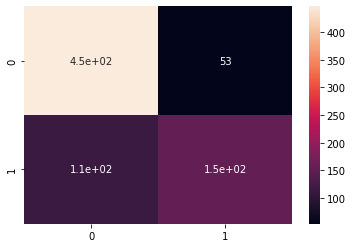

In [14]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [15]:
logistic.score(X, y)

0.7825520833333334

In [16]:
metrics.accuracy_score(y_test, y_pred)

NameError: name 'y_test' is not defined

## Исследуйте точность этой модели и сравните ее с линейной самостоятельно.

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [18]:
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

In [19]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
polynomial = LogisticRegression()
poly_train, poly_test, y_train, y_test = train_test_split(poly, y, test_size=0.33, random_state=42)
polynomial.fit(poly_train, y_train)
y_pred_poly = polynomial.predict(poly_test)
# Оценка качества полиномиальной модели
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Precision:", precision_score(y_test, y_pred_poly))
print("Recall:", recall_score(y_test, y_pred_poly))
print("F1-score:", f1_score(y_test, y_pred_poly))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_poly))

Accuracy: 0.6929133858267716
Precision: 0.55
Recall: 0.5116279069767442
F1-score: 0.5301204819277109
Confusion matrix:
 [[132  36]
 [ 42  44]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 1) Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.
## 2) Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:
### i) Метод опорных векторов
#### a) Без ядра
#### b) С линейным ядром
#### c) С гауссовым ядром
#### d) С полиномиальным ядром
### ii) Метод ближайших соседей
### iii) Многослойный перцептрон
### iv) Дерево решений
### v) Наивный байесовский классификатор
### vi) (*) Другие методы:
#### a) Пассивно-агрессивный классификатор
#### b)Гребневый классификатор
#### c)Случайный лес
#### d)Беггинг
#### e)Другие модели по желанию
## 3) Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.
## 4) Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [21]:
data1 = data.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



# Разделяем данные на признаки и целевую переменную
y = data1.Outcome
X = data1.drop(["Outcome"], axis=1)

# Создаем список моделей для обучения
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Linear SVM', SVC(kernel='linear', random_state=42)),
    ('RBF SVM', SVC(kernel='rbf', random_state=42)),
    ('Poly SVM', SVC(kernel='poly', degree=3, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('Bagging', BaggingClassifier(base_estimator=SVC(kernel='linear', random_state=42))),
    ('Passive Aggressive', PassiveAggressiveClassifier(max_iter=1000, random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42))
]

# Обучаем и тестируем модели
for name, model in models:
    if name == 'Poly SVM':
        poly_model = make_pipeline(PolynomialFeatures(2), model)
        poly_model.fit(X, y)
        y_pred = poly_model.predict(X)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)
    
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {acc:.2f}')
    print(f'Confusion Matrix:\n{cm}\n')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.78
Confusion Matrix:
[[447  53]
 [114 154]]

Model: Linear SVM
Accuracy: 0.78
Confusion Matrix:
[[443  57]
 [114 154]]

Model: RBF SVM
Accuracy: 0.77
Confusion Matrix:
[[457  43]
 [135 133]]

Model: Poly SVM
Accuracy: 0.72
Confusion Matrix:
[[487  13]
 [202  66]]

Model: KNN
Accuracy: 0.80
Confusion Matrix:
[[442  58]
 [ 93 175]]



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model: MLP
Accuracy: 0.65
Confusion Matrix:
[[500   0]
 [268   0]]

Model: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[500   0]
 [  0 268]]

Model: Gaussian Naive Bayes
Accuracy: 0.76
Confusion Matrix:
[[421  79]
 [103 165]]

Model: Random Forest
Accuracy: 0.99
Confusion Matrix:
[[499   1]
 [ 10 258]]

Model: Bagging
Accuracy: 0.78
Confusion Matrix:
[[452  48]
 [119 149]]

Model: Passive Aggressive
Accuracy: 0.46
Confusion Matrix:
[[204 296]
 [118 150]]

Model: Ridge
Accuracy: 0.78
Confusion Matrix:
[[447  53]
 [114 154]]



In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

# Разделяем данные на признаки и целевую переменную
X = iris.data
y = iris.target

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Загружаем данные


# Создаем список моделей для обучения
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Linear SVM', SVC(kernel='linear', random_state=42)),
    ('RBF SVM', SVC(kernel='rbf', random_state=42)),
    ('Poly SVM', SVC(kernel='poly', degree=3, random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('MLP', MLPClassifier(hidden_layer_sizes=(5, 2), random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('Bagging', BaggingClassifier(base_estimator=SVC(kernel='linear', random_state=42))),
    ('Passive Aggressive', PassiveAggressiveClassifier(max_iter=1000, random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42))
]

# Обучаем и тестируем модели
for name, model in models:
    if name == 'Poly SVM':
        poly_model = make_pipeline(PolynomialFeatures(2), model)
        poly_model.fit(X, y)
        y_pred = poly_model.predict(X)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)
    
    acc = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    
    print(f'Model: {name}')
    print(f'Accuracy: {acc:.2f}')
    print(f'Confusion Matrix:\n{cm}\n')


Model: Logistic Regression
Accuracy: 0.97
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Model: Linear SVM
Accuracy: 0.99
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]

Model: RBF SVM
Accuracy: 0.97
Confusion Matrix:
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]

Model: Poly SVM
Accuracy: 0.97
Confusion Matrix:
[[50  0  0]
 [ 2 46  2]
 [ 0  1 49]]

Model: KNN
Accuracy: 0.97
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]

Model: MLP
Accuracy: 0.66
Confusion Matrix:
[[50  0  0]
 [ 1 49  0]
 [ 0 50  0]]

Model: Decision Tree
Accuracy: 1.00
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]

Model: Gaussian Naive Bayes
Accuracy: 0.96
Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Model: Random Forest
Accuracy: 1.00
Confusion Matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]

Model: Bagging
Accuracy: 0.99
Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]

Model: Passive Aggressive
Accuracy: 0.96
Confusion Matrix:
[[50  0  0]
 [ 0 46  4]
 [ 0  2 48]]

Model: Rid

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Confusion matrix:\n{cm}\n')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

MLP:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Decision Tree:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Naive Bayes:
Accuracy: 1.00
Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
